In [3]:
import os
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tqdm.notebook import tqdm_notebook as tqdm
from tqdm.notebook import trange

from gensim import corpora, models, similarities, downloader

tqdm.pandas()

In [4]:
SEED = 1234
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ":4096:8"
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [5]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG, force=True)
logging.debug("logging enabled")

2025-02-05 23:40:45,661 : DEBUG : logging enabled


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')
# FOLDER_PATH = r'/content/drive/MyDrive/Colab Notebooks/data science 5th semester/lecture8'
FOLDER_PATH = '.'

In [7]:
df = pd.read_csv(f'{FOLDER_PATH}/train.csv')
df = df.sample(len(df) // 4)

df.head(3)

,oid,category,text
32194,596221480,motosport,Трансферы Speetokenoid Максим Драбик уходит в ...
34128,127998890,tennis,Серб Новак Джокович не сможет сыграть на US Op...
29552,562401771,basketball,Martokenoid Smart один из героев второго финал...


In [8]:
import nltk.corpus

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words())
stopwords.add('это')

[nltk_data] Downloading package stopwords to /home/derlie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. Градиентный бустинг

In [ ]:
!pip install catboost

In [ ]:
!pip install optuna

In [7]:
import catboost as cb
import optuna

1. В методах преобразования данных пробуйте различные параметры, в поисках лучших для решения текущей задачи
2. Не забывайте про подбор параметров у самого бустинга с помощью optuna

https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/

### Мешок слов

In [9]:
# обучите градиентный бустинг на мешке слов https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
X = CountVectorizer().fit_transform(df['text'])
y = df['category'].to_numpy()

In [ ]:
X.shape

(9685, 72384)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
# enable gpu in google colab or set task_type to 'CPU'
model = cb.CatBoostClassifier(task_type='GPU')
model.fit(X_train, y_train, verbose=True)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

Learning rate set to 0.098555
0:	learn: 2.4709749	total: 429ms	remaining: 7m 8s
1:	learn: 2.4224810	total: 544ms	remaining: 4m 31s
2:	learn: 2.3829567	total: 655ms	remaining: 3m 37s
3:	learn: 2.3556001	total: 740ms	remaining: 3m 4s
4:	learn: 2.3228010	total: 813ms	remaining: 2m 41s
5:	learn: 2.3001384	total: 876ms	remaining: 2m 25s
6:	learn: 2.2766954	total: 948ms	remaining: 2m 14s
7:	learn: 2.2561851	total: 1.02s	remaining: 2m 6s
8:	learn: 2.2363100	total: 1.08s	remaining: 1m 59s
9:	learn: 2.2198103	total: 1.15s	remaining: 1m 53s
10:	learn: 2.2053592	total: 1.22s	remaining: 1m 49s
11:	learn: 2.1906596	total: 1.28s	remaining: 1m 45s
12:	learn: 2.1795128	total: 1.34s	remaining: 1m 42s
13:	learn: 2.1642803	total: 1.42s	remaining: 1m 39s
14:	learn: 2.1515855	total: 1.5s	remaining: 1m 38s
15:	learn: 2.1411876	total: 1.57s	remaining: 1m 36s
16:	learn: 2.1310701	total: 1.64s	remaining: 1m 34s
17:	learn: 2.1194426	total: 1.7s	remaining: 1m 32s
18:	learn: 2.1090809	total: 1.76s	remaining: 1m 3

### Мешок слов + n-grams

In [ ]:
# обучите градиентный бустинг на мешке слов с n-граммами https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html с n-граммами

In [10]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['text'])
y = df['category'].to_numpy()

NameError: name 'CountVectorizer' is not defined

In [ ]:
X.shape

(9685, 414138)

In [ ]:
vectorizer.get_feature_names_out()[4090]

'19 бен'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
model = cb.CatBoostClassifier(task_type='GPU')
model.fit(X_train, y_train, verbose=True)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

Learning rate set to 0.098555
0:	learn: 2.4709744	total: 568ms	remaining: 9m 27s
1:	learn: 2.4224810	total: 835ms	remaining: 6m 56s
2:	learn: 2.3829572	total: 1.12s	remaining: 6m 11s
3:	learn: 2.3555998	total: 1.39s	remaining: 5m 45s
4:	learn: 2.3228008	total: 1.7s	remaining: 5m 37s
5:	learn: 2.3001384	total: 1.96s	remaining: 5m 24s
6:	learn: 2.2766954	total: 2.27s	remaining: 5m 21s
7:	learn: 2.2561848	total: 2.58s	remaining: 5m 19s
8:	learn: 2.2363105	total: 2.9s	remaining: 5m 18s
9:	learn: 2.2198097	total: 3.22s	remaining: 5m 19s
10:	learn: 2.2053592	total: 3.56s	remaining: 5m 20s
11:	learn: 2.1906596	total: 3.91s	remaining: 5m 21s
12:	learn: 2.1795128	total: 4.23s	remaining: 5m 20s
13:	learn: 2.1642803	total: 4.62s	remaining: 5m 25s
14:	learn: 2.1515855	total: 5s	remaining: 5m 28s
15:	learn: 2.1411876	total: 5.34s	remaining: 5m 28s
16:	learn: 2.1310696	total: 5.67s	remaining: 5m 27s
17:	learn: 2.1194426	total: 6s	remaining: 5m 27s
18:	learn: 2.1090811	total: 6.36s	remaining: 5m 28s


### Мешок слов + m-skip-n-grams

In [ ]:
from toolz import itertoolz, compose
from toolz.curried import map as cmap, sliding_window, pluck
from sklearn.feature_extraction.text import CountVectorizer

class SkipGramVectorizer(CountVectorizer):
    def build_analyzer(self):
        preprocess = self.build_preprocessor()
        stop_words = self.get_stop_words()
        tokenize = self.build_tokenizer()
        return lambda doc: self._word_skip_grams(
                compose(tokenize, preprocess, self.decode)(doc),
                stop_words)

    def _word_skip_grams(self, tokens, stop_words=None):
        # handle stop words
        if stop_words is not None:
            tokens = [w for w in tokens if w not in stop_words]

        return compose(cmap(' '.join), pluck([0, 2]), sliding_window(3))(tokens)

In [ ]:
skip_grams_vectorizer = SkipGramVectorizer()
skip_grams_X = skip_grams_vectorizer.fit_transform(df['text'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(skip_grams_X, df['category'].to_numpy(), test_size=0.2, random_state=SEED)

In [ ]:
model = cb.CatBoostClassifier(task_type='GPU')
model.fit(X_train, y_train, verbose=True)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

Learning rate set to 0.098555
0:	learn: 2.5424111	total: 436ms	remaining: 7m 15s
1:	learn: 2.5285749	total: 653ms	remaining: 5m 25s
2:	learn: 2.5178879	total: 878ms	remaining: 4m 51s
3:	learn: 2.5097901	total: 1.09s	remaining: 4m 30s
4:	learn: 2.5025006	total: 1.31s	remaining: 4m 21s
5:	learn: 2.4965861	total: 1.53s	remaining: 4m 12s
6:	learn: 2.4903014	total: 1.77s	remaining: 4m 10s
7:	learn: 2.4850312	total: 1.99s	remaining: 4m 6s
8:	learn: 2.4802565	total: 2.2s	remaining: 4m 2s
9:	learn: 2.4760145	total: 2.41s	remaining: 3m 58s
10:	learn: 2.4715320	total: 2.64s	remaining: 3m 57s
11:	learn: 2.4672110	total: 2.85s	remaining: 3m 55s
12:	learn: 2.4636922	total: 3.06s	remaining: 3m 52s
13:	learn: 2.4601306	total: 3.28s	remaining: 3m 50s
14:	learn: 2.4560824	total: 3.49s	remaining: 3m 49s
15:	learn: 2.4533635	total: 3.71s	remaining: 3m 47s
16:	learn: 2.4500738	total: 3.93s	remaining: 3m 47s
17:	learn: 2.4473831	total: 4.14s	remaining: 3m 46s
18:	learn: 2.4443342	total: 4.36s	remaining: 3m

### TF-IDF

In [ ]:
# обучите градиентный бустинг на мешке слов https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['category'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

model = cb.CatBoostClassifier(task_type='GPU')
model.fit(X_train, y_train, verbose=True)
pred= model.predict(X_test)
print(classification_report(y_test, pred))

Learning rate set to 0.098555
0:	learn: 2.4707999	total: 351ms	remaining: 5m 50s
1:	learn: 2.4222693	total: 514ms	remaining: 4m 16s
2:	learn: 2.3826912	total: 672ms	remaining: 3m 43s
3:	learn: 2.3553339	total: 816ms	remaining: 3m 23s
4:	learn: 2.3224988	total: 982ms	remaining: 3m 15s
5:	learn: 2.2970736	total: 1.12s	remaining: 3m 5s
6:	learn: 2.2736772	total: 1.3s	remaining: 3m 4s
7:	learn: 2.2557409	total: 1.46s	remaining: 3m 1s
8:	learn: 2.2357937	total: 1.66s	remaining: 3m 2s
9:	learn: 2.2184568	total: 1.83s	remaining: 3m 1s
10:	learn: 2.2045283	total: 1.98s	remaining: 2m 58s
11:	learn: 2.1894861	total: 2.13s	remaining: 2m 55s
12:	learn: 2.1777001	total: 2.26s	remaining: 2m 51s
13:	learn: 2.1630154	total: 2.43s	remaining: 2m 50s
14:	learn: 2.1502916	total: 2.59s	remaining: 2m 50s
15:	learn: 2.1387790	total: 2.74s	remaining: 2m 48s
16:	learn: 2.1284336	total: 2.91s	remaining: 2m 48s
17:	learn: 2.1179198	total: 3.17s	remaining: 2m 52s
18:	learn: 2.1088045	total: 3.37s	remaining: 2m 53

### TF-IDF + n-grams

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['text'])
y = df['category'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

model = cb.CatBoostClassifier(task_type='GPU')
model.fit(X_train, y_train, verbose=True)
pred= model.predict(X_test)
print(classification_report(y_test, pred))

Learning rate set to 0.098555
0:	learn: 2.4707992	total: 738ms	remaining: 12m 17s
1:	learn: 2.4222695	total: 1.16s	remaining: 9m 40s
2:	learn: 2.3826910	total: 1.61s	remaining: 8m 56s
3:	learn: 2.3552661	total: 2.04s	remaining: 8m 27s
4:	learn: 2.3225238	total: 2.53s	remaining: 8m 23s
5:	learn: 2.2975231	total: 2.92s	remaining: 8m 4s
6:	learn: 2.2737473	total: 3.49s	remaining: 8m 15s
7:	learn: 2.2553910	total: 3.91s	remaining: 8m 4s
8:	learn: 2.2355008	total: 4.42s	remaining: 8m 7s
9:	learn: 2.2194326	total: 4.91s	remaining: 8m 5s
10:	learn: 2.2064026	total: 5.33s	remaining: 7m 58s
11:	learn: 2.1911401	total: 5.81s	remaining: 7m 58s
12:	learn: 2.1767820	total: 6.3s	remaining: 7m 58s
13:	learn: 2.1620532	total: 6.86s	remaining: 8m 2s
14:	learn: 2.1502374	total: 7.32s	remaining: 8m
15:	learn: 2.1388120	total: 7.76s	remaining: 7m 57s
16:	learn: 2.1286325	total: 8.28s	remaining: 7m 58s
17:	learn: 2.1171512	total: 8.83s	remaining: 8m 1s
18:	learn: 2.1077929	total: 9.29s	remaining: 7m 59s
19

### Генерация искусственных данных и балансировка классов

Выберите лучшее представление данных, опираясь на метрику. Попробуйте сбалансировать классы с помощью весов (параметр catboost), если выше этого не делали. Попробуйте сгенерировать новые данные для классов, в которых меньше всего объектов. Генерация представляет собой семплирование токенов из всего множества токенов определенного класса. Обучите модель на новом датасете, сравните качество

1. признаки предложений (длина предложений, наличие орф.знаков, количество предложений в тексте)
2. обработка опечаток (расстояние между словом нормальным и словом с опечаткой)
3. склеивание с частицей не.

In [9]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['text'])
y = df['category'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

NameError: name 'CountVectorizer' is not defined

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

model = cb.CatBoostClassifier(task_type='GPU', class_weights=class_weights)
model.fit(X_train, y_train, verbose=True)

Learning rate set to 0.098555
0:	learn: 2.4713351	total: 568ms	remaining: 9m 27s
1:	learn: 2.4224709	total: 836ms	remaining: 6m 57s
2:	learn: 2.3833832	total: 1.12s	remaining: 6m 12s
3:	learn: 2.3534118	total: 1.39s	remaining: 5m 46s
4:	learn: 2.3233965	total: 1.72s	remaining: 5m 41s
5:	learn: 2.3007220	total: 2.08s	remaining: 5m 45s
6:	learn: 2.2772777	total: 2.52s	remaining: 5m 57s
7:	learn: 2.2582226	total: 2.82s	remaining: 5m 50s
8:	learn: 2.2400937	total: 3.15s	remaining: 5m 46s
9:	learn: 2.2222791	total: 3.48s	remaining: 5m 44s
10:	learn: 2.2077209	total: 3.76s	remaining: 5m 38s
11:	learn: 2.1910622	total: 4.13s	remaining: 5m 40s
12:	learn: 2.1772968	total: 4.47s	remaining: 5m 39s
13:	learn: 2.1638797	total: 4.82s	remaining: 5m 39s
14:	learn: 2.1509548	total: 5.16s	remaining: 5m 39s
15:	learn: 2.1392902	total: 5.51s	remaining: 5m 38s
16:	learn: 2.1290860	total: 5.84s	remaining: 5m 37s
17:	learn: 2.1180658	total: 6.14s	remaining: 5m 34s
18:	learn: 2.1083701	total: 6.41s	remaining:

In [ ]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   athletics       0.94      0.73      0.82       131
   autosport       0.81      0.68      0.74       168
  basketball       0.97      0.64      0.77       138
  boardgames       0.87      0.77      0.82       144
      esport       0.42      0.64      0.51       160
     extreme       0.39      0.64      0.49       149
    football       0.37      0.67      0.48       147
      hockey       0.77      0.63      0.69       126
martial_arts       0.85      0.54      0.66       161
   motosport       0.90      0.71      0.80       161
      tennis       0.93      0.84      0.88       152
  volleyball       0.93      0.66      0.77       152
winter_sport       0.73      0.70      0.71       148

    accuracy                           0.68      1937
   macro avg       0.76      0.68      0.70      1937
weighted avg       0.76      0.68      0.70      1937



## Понижение размерности

In [11]:
# уменьшите размерность векторов с помощью PCA, посмотрите, улучшается ли качество.
lowdim_X = TruncatedSVD(n_components=100).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(lowdim_X, y, test_size=0.2, random_state=SEED)


In [ ]:
model = cb.CatBoostClassifier(task_type='GPU')
model.fit(X_train, y_train, verbose=True)
pred= model.predict(X_test)
print(classification_report(y_test, pred))

Learning rate set to 0.098555
0:	learn: 2.5166442	total: 41.2ms	remaining: 41.2s
1:	learn: 2.4834322	total: 65.2ms	remaining: 32.5s
2:	learn: 2.4506360	total: 90.6ms	remaining: 30.1s
3:	learn: 2.4243424	total: 115ms	remaining: 28.5s
4:	learn: 2.3958517	total: 140ms	remaining: 27.9s
5:	learn: 2.3756857	total: 164ms	remaining: 27.2s
6:	learn: 2.3522993	total: 188ms	remaining: 26.7s
7:	learn: 2.3297053	total: 211ms	remaining: 26.2s
8:	learn: 2.3082181	total: 237ms	remaining: 26s
9:	learn: 2.2874204	total: 261ms	remaining: 25.9s
10:	learn: 2.2654803	total: 286ms	remaining: 25.7s
11:	learn: 2.2457323	total: 305ms	remaining: 25.1s
12:	learn: 2.2271718	total: 319ms	remaining: 24.2s
13:	learn: 2.2091238	total: 333ms	remaining: 23.5s
14:	learn: 2.1954363	total: 349ms	remaining: 22.9s
15:	learn: 2.1826172	total: 364ms	remaining: 22.4s
16:	learn: 2.1612815	total: 379ms	remaining: 21.9s
17:	learn: 2.1414947	total: 394ms	remaining: 21.5s
18:	learn: 2.1237671	total: 408ms	remaining: 21.1s
19:	learn:

качество ухудшилось)

# 5. Интерпретация результатов

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Catboost%20tutorial.html

In [ ]:
# используя туториал выше, интерпретируйте результаты. Определите, какие слова влияют в каждом классе больше остальных.

## Визуализация результатов

In [ ]:
# С помощью методов понижения размерности T-SNE И U-MAP взгляните на получившиеся векторные представления данных

In [12]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.WARNING, force=True)
logging.debug("logging enabled")

<Axes: >

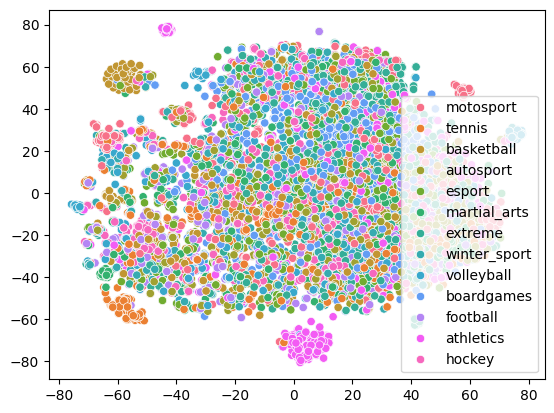

In [13]:
from sklearn.manifold import TSNE

tsne_X = TSNE(n_jobs=-1).fit_transform(lowdim_X)
sns.scatterplot(x=tsne_X[:, 0], y=tsne_X[:, 1], hue=y)

<Axes: >

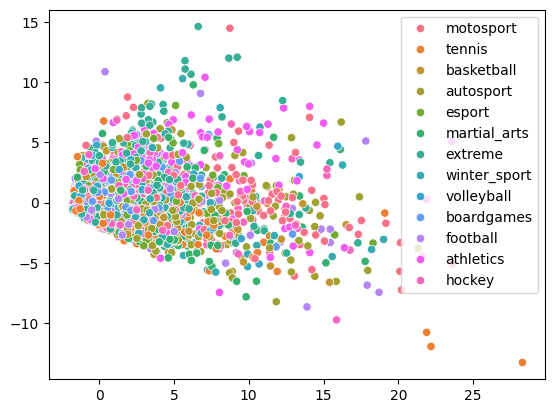

In [14]:
pca_X = PCA(n_components=2).fit_transform(lowdim_X)
sns.scatterplot(x=pca_X[:, 0], y=pca_X[:, 1], hue=y)

In [15]:
import umap
reducer = umap.UMAP()

In [16]:
embedding = reducer.fit_transform(lowdim_X)

/home/derlie/Desktop/repos/data-science/venv8/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

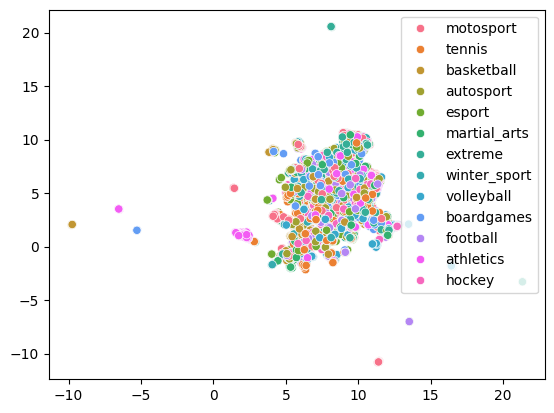

In [23]:
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y)

лучше всех с графическим отображением справился t-sne, на нём более-менее видны кластеры